In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
from IPython.core.debugger import set_trace

In [2]:
assets = {
    'XLB' : 'xlb_spdr_material',
    'XLY' : 'xly_spdr_consumer_disc',
    'XLP' : 'xlp_spdr_consumer_stp',
    'XLE' : 'xle_spdr_energy',
    'XLF' : 'xlf_spdr_financial',
    'XLV' : 'xlv_spdr_healthcare',
    'XLI' : 'xli_spdr_industrial',
    'IYR' : 'iyr_ishares_reit',
    'XLK' : 'xlk_spdr_tech',
    'IYZ' : 'iyz_ishares_telcom',
    'XLU' : 'xlu_spdr_util',
    'RXI' : 'rxi_ishares_consumer_disc_global',
    'KXI' : 'kxi_ishares_consumer_stp_global',
    'IXC' : 'ixc_ishares_energy_global',
    'IXG' : 'ixg_ishares_financial_global',
    'IXJ' : 'ixj_ishares_healthcare_global',
    'EXI' : 'exi_ishares_industrial_global',
    'MXI' : 'mxi_ishares_material_global',
    'IXN' : 'ixn_ishares_tech_global',
    'IXP' : 'ixp_ishares_telcom_global',
    'JXI' : 'jxi_ishares_util_global',
    'RWX' : 'rwx_spdr_global_reit',
    'CARZ' : 'carz_firstrust_automotive',
    'IYC' : 'iyc_ishares_consumer_service',
    'BJK' : 'bjk_vaneck_gaming',
    'PBS' : 'pbs_invesco_media',
    'IBUY' : 'ibuy_amplify_online_retail',
    'IYK' : 'iyk_ishares_consumer_goods',
    'PBJ' : 'pbj_invesco_food_beverage',
    'AMLP' : 'amlp_alerian_mlp',
    'FCG' : 'fcg_firstrust_natural_gas',
    'XOP' : 'xop_spdr_exploration',
    'OIH' : 'oih_vaneck_oil_service',
    'TAN' : 'tan_invesco_solar',
    'FAN' : 'fan_firstrust_wind',
    'KBE' : 'kbe_spdr_bank',
    'IAI' : 'iai_ishares_broker',
    'BIZD' : 'bizd_vaneck_bdc',
    'KCE' : 'kce_spdr_capital_market',
    'QABA' : 'qaba_firstrust_community_bank',
    'IYG' : 'iyg_ishares_financial_service',
    'KIE' : 'kie_spdr_insurance',
    'PSP' : 'psp_invesco_pe',
    'KRE' : 'kre_spdr_regional_bank',
    'IBB' : 'ibb_ishares_bio',
    'IHF' : 'ihf_ishares_healthcare_service',
    'IHI' : 'ihi_ishares_medical_device',
    'PJP' : 'pjp_invesco_pharma',
    'ITA' : 'ita_ishares_aerospace',
    'JETS' : 'jets_usglobal_airlines',
    'IYT' : 'iyt_ishares_transportation',
    'CGW' : 'cgw_invesco_water',
    'MOO' : 'moo_vaneck_agribiz',
    'GDX' : 'gdx_vaneck_gold_miner',
    'SIL' : 'sil_globalx_silver_miner',
    'ITB' : 'itb_ishares_homebuilder',
    'LIT' : 'lit_globalx_lithium',
    'PICK' : 'pick_ishares_metal_mining',
    'GUNR' : 'gunr_flexshares_natural_resource',
    'SLX' : 'slx_vaneck_steel',
    'WOOD' : 'wood_ishares_timber',
    'URA' : 'ura_globalx_uranium',
    'SKYY' : 'skyy_firstrust_cloud',
    'FDN' : 'fdn_firstrust_internet',
    'CIBR' : 'cibr_firstrust_cybersecurity',
    'PXQ' : 'pxq_invesco_networking',
    'SOXX' : 'soxx_ishares_semiconductor',
    'SOCL' : 'socl_globalx_sns',
    'IGV' : 'igv_ishares_software',
    'IGF' : 'igf_ishares_infra',
    'VNQ' : 'vnq_vanguard_us_reit',
    'REM' : 'rem_ishares_us_mortgage_reit',
    'SPY' : 'spy_spdr_us',
    'SSO' : 'sso_proshares_us_lev',
    'QQQ' : 'qqq_invesco_us_nasdaq',
    'QLD' : 'qld_proshares_us_nasdaq_lev',
    'EWC' : 'ewc_ishares_canada',
    'EWW' : 'eww_ishares_mexico',
    'EPU' : 'epu_ishares_peru',
    'EWZ' : 'ewz_ishares_brazil',
    'ARGT' : 'argt_globalx_argentina',
    'EWU' : 'ewu_ishares_uk',
    'EWP' : 'ewp_ishares_spain',
    'EWG' : 'ewg_ishares_germany',
    'EWI' : 'ewi_ishares_italy',
    'EGPT' : 'egpt_vaneck_egypt',
    'INDA' : 'inda_ishares_india',
    'AFK' : 'afk_vaneck_africa',
    'EZA' : 'eza_ishares_south_africa',
    'RSX' : 'rsx_vaneck_russia',
    'EWY' : 'ewy_ishares_skorea',
    'EWJ' : 'ewj_ishares_jp',
    'MCHI' : 'mchi_ishares_china',
    'EWS' : 'ews_ishares_singapore',
    'EWA' : 'ewa_ishares_australia',
    'EWO' : 'ewo_ishares_austria',
    'EWK' : 'ewk_ishares_belgium',
    'EWQ' : 'ewq_ishares_fr',
    'EWH' : 'ewh_ishares_hk',
    'EWM' : 'ewm_ishares_malaysia',
    'EWN' : 'ewn_ishares_netherland',
    'EWD' : 'ewd_ishares_sweden',
    'EWL' : 'ewl_ishares_switzerland',
    'EWT' : 'ewt_ishares_taiwan',
    'VNM' : 'vnm_vaneck_vietnam',
    'EPOL' : 'epol_ishares_poland',
    'ENZL' : 'enzl_ishares_newzealand',
    'GREK' : 'grek_globalx_greece',
    'NORW' : 'norw_globalx_norway',
    'EIDO' : 'eido_ishares_indonesia',
    'EPHE' : 'ephe_ishares_philip',
    'THD' : 'thd_ishares_thailand',
    'TUR' : 'tur_ishares_turkey',
    'ECH' : 'ech_ishares_chile',
    'GXG' : 'gxg_globalx_colombia',
    'KSA' : 'ksa_ishares_saudi',
    'ASHR' : 'ashr_deutsche_china_csi300',
    'EIRL' : 'eirl_ishares_ireland',
    'EIS' : 'eis_ishares_israel',
    'EPI' : 'epi_wisdomtree_india',
    'FXI' : 'fxi_ishares_china_largecap',
    'IDX' : 'idx_vaneck_indonesia',
    'QUAL' : 'qual_ishares_qual',
    'IVE' : 'ive_ishares_value',
    'IVW' : 'ivw_ishares_growth',
    'MTUM' : 'mtum_ishares_mtum',
    'EEMO' : 'eemo_pshares_mtum_em',
    'VIG' : 'vig_vanguard_dvd_apprec',
    'DVY' : 'dvy_ishares_high_dvd',
    'SPHB' : 'sphb_pshares_high_beta',
    'USLB' : 'uslb_pshares_low_beta',
    'SPLV' : 'splv_pshares_low_vol',
    'COWZ' : 'cowz_pacer_fcf',
    'DEF' : 'def_pshares_defensive',
    'EUSA' : 'eusa_ishares_ew',
    'CSM' : 'csm_pshares_130_30',
    'SHE' : 'she_spdr_gender',
    'QYLD' : 'qyld_horizons_covered_call',
    'GVIP' : 'gvip_gs_hedgefund_hold',
    'MOAT' : 'moat_vaneck_moat',
    'FTLS' : 'ftls_firstrust_long_short',
    'WTMF' : 'wtmf_wisdomtree_mgd_futs',
    'MNA' : 'mna_iq_m&a',
    'SUSA' : 'susa_ishares_esg',
    'IPO' : 'ipo_renaissance_ipo',
    'KNOW' : 'know_direxion_insider',
    'NFO' : 'nfo_pshares_insider',
    'IWM' : 'iwm_ishares_smallcap',
    'XRLV' : 'xrlv_pshares_xrate_sen_lowvol',
    'UUP' : 'uup_pshares_usd_up',
    'FXY' : 'fxy_cshares_jpy',
    'FXE' : 'fxe_cshares_eur',
    'FXA' : 'fxa_cshares_aud',
    'FXC' : 'fxc_cshares_cad',
    'FXF' : 'fxf_cshares_chf',
    'FXB' : 'fxb_cshares_gbp',
    'UDN' : 'udn_pshares_usd_down',
    'DBC' : 'dbc_pshares_comdty',
    'USO' : 'uso_uns_wti',
    'GLD' : 'gld_spdr_gold',
    'SLV' : 'slv_ishares_silver',
    'DBA' : 'dba_pshares_agriculture',
    'UNG' : 'ung_uns_ngas',
    'DBE' : 'dbe_pshares_energy',
    'DBB' : 'dbb_pshares_bmetal',
    'GLTR' : 'gltr_etfs_pmetal',
    'AGG' : 'agg_ishares_us_bd_agg',
    'BIL' : 'bil_spdr_us_tbil',
    'SHY' : 'shy_ishares_us_bd_short',
    'IEF' : 'ief_ishares_us_bd_interm',
    'TLT' : 'tlt_ishares_us_bd_long',
    'TIP' : 'tip_ishares_us_tip',
    'LQD' : 'lqd_ishares_us_ig',
    'HYG' : 'hyg_ishares_us_hy',
    'MBB' : 'mbb_ishares_us_mbs',
    'MUB' : 'mub_ishares_us_muni',
    'BKLN' : 'bkln_pshares_us_bankloan',
    'CWB' : 'cwb_spdr_us_cb',
    'HYD' : 'hyd_vaneck_us_hy_muni',
    'PFF' : 'pff_ishares_us_pref',
    'TMF' : 'tmf_direxion_us_bd_long_3x',
    'BWX' : 'bwx_spdr_global_sov_loc',
    'WIP' : 'wip_spdr_global_tip_loc',
    'BNDX' : 'bndx_vangard_global_sov_loc_h',
    'IGOV' : 'igov_ishares_developed_sov_loc',
    'FLOT' : 'flot_ishares_developed_float_usd',
    'PICB' : 'picb_pshares_developed_ig_loc',
    'HYXU' : 'hyxu_ishares_developed_hy_loc',
    'EMB' : 'emb_ishares_em_sov_usd',
    'EMLC' : 'emlc_vaneck_em_sov_loc',
    'EMHY' : 'emhy_ishares_em_hy_usd',
    'DSUM' : 'dsum_pshares_china_credit_loc',
    'ACWI' : 'acwi_ishares_acwi',
    'VTI' : 'vti_vanguard_us_total',
    'GWX' : 'gwx_spdr_intl_smallcap',
    'VEU' : 'veu_vanguard_global',
    'IEV' : 'iev_ishares_europe',
    'EFA' : 'efa_ishares_developed',
    'EEM' : 'eem_ishares_em',
    'AAXJ' : 'aaxj_ishares_asia_xjp',
    'BKF' : 'bkf_ishares_bric',
    'FM' : 'fm_ishares_frontier',
    'ILF' : 'ilf_ishares_latam',
    'FRN' : 'frn_invesco_frontier',
    'GULF' : 'gulf_wisdomtree_middle_east',
    'AOM' : 'aom_ishares_global_alloc',
    
    'MGC' : 'mgc_vangard_us_mega_cap',
    'VO'  : 'vo_vangard_us_mid_cap',
    'IJH' : 'ijh_ishares_us_small_cap'
}

In [3]:
symbols = ' '.join(assets.keys())
start = '2008-12-20'
end = '2021-05-31'
db = yf.download(symbols, start=start, end=end, threads=True)['Adj Close']
db = db.rename(columns=assets).fillna(method='ffill')

[*********************100%***********************]  209 of 209 completed


In [4]:
def rebuild(symbol, pkl='prices_global.pkl'):
    market = db[symbol]
    
    if symbol in pd.read_pickle(pkl).reprice.unstack().columns:
        support = pd.read_pickle(pkl).reprice.unstack()[symbol].loc[market.index[0]:]
        df_r = pd.DataFrame({'support':support, 'market':market}).fillna(method='ffill').pct_change()
        df_p = (df_r.market.combine_first(df_r.support).fillna(0) + 1).cumprod()
        return df_p / df_p[-1] * market[-1]
    else:
        return market

<AxesSubplot:xlabel='Date'>

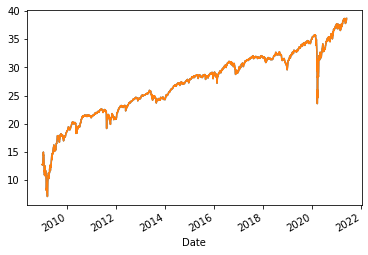

In [5]:
rebuild('pff_ishares_us_pref', pkl='prices_global.pkl').plot()
db['pff_ishares_us_pref'].plot()

In [6]:
for name in assets.values():
    db[name] = rebuild(name, pkl='prices_global.pkl')

In [7]:
pkl = pd.DataFrame()
pkl['close'] = db.stack()
pkl['high'] = db.stack()
pkl['low'] = db.stack()
pkl['underlying'] = db.stack()
pkl['reprice'] = db.stack(); pkl

close        high         low  \
Date                                                                           
2008-12-19 aaxj_ishares_asia_xjp           27.816267   27.816267   27.816267   
           acwi_ishares_acwi               24.574461   24.574461   24.574461   
           afk_vaneck_africa               15.604188   15.604188   15.604188   
           agg_ishares_us_bd_agg           72.160629   72.160629   72.160629   
           amlp_alerian_mlp                15.255766   15.255766   15.255766   
...                                              ...         ...         ...   
2021-05-28 xlu_spdr_util                   65.160004   65.160004   65.160004   
           xlv_spdr_healthcare            123.599998  123.599998  123.599998   
           xly_spdr_consumer_disc         172.839996  172.839996  172.839996   
           xop_spdr_exploration            89.070000   89.070000   89.070000   
           xrlv_pshares_xrate_sen_lowvol   46.761002   46.761002   46.761002   

                                          underlying     reprice  
Date                                                              
2008-12-19 aaxj_ishares_asia_xjp           27.816267   27.816267  
           acwi_ishares_acwi               24.574461   24.574461  
           afk_vaneck_africa               15.604188   15.604188  
           agg_ishares_us_bd_agg           72.160629   72.160629  
           amlp_alerian_mlp                15.255766   15.255766  
...                                              ...         ...  
2021-05-28 xlu_spdr_util                   65.160004   65.160004  
           xlv_spdr_healthcare            123.599998  123.599998  
           xly_spdr_consumer_disc         172.839996  172.839996  
           xop_spdr_exploration            89.070000   89.070000  
           xrlv_pshares_xrate_sen_lowvol   46.761002   46.761002  

[654379 rows x 5 columns]

In [8]:
pkl.to_pickle('global_20210531.pkl')